In [34]:
import numpy as np
import math 
import matplotlib.pyplot as plt


# For function = x^0.5

In [40]:
def interplot(func ,x, l):
    nodes = np.linspace(1,64,l)
    number_of_nodes = len(nodes)
    n = number_of_nodes - 1
    denominators = np.zeros(n+1)
    for i in range(n+1):
        x_i = nodes[i]
        new_array = np.delete(nodes, i)
        newvector = new_array - x_i
        denominators[i] = 1/np.prod(newvector)
    
    numerators = np.zeros(n+1)
    for i in range(n+1):
        b = x
        new_array2 = np.delete(nodes, i)
        xvector = np.full(n, b)
        newvector2 = new_array2 - xvector
        numerators[i] = np.prod(newvector2)
        
    f_values = np.zeros(n+1)
    for i in range(n+1):
        f_values[i] = func(nodes[i])
    
    polynomial = numerators * denominators * f_values
    return np.sum(polynomial)


In [42]:
plotnodes = np.linspace(1,64,1000)

In [43]:
y1 = np.sqrt(plotnodes) 

In [50]:
interplotvalues = np.zeros(1000)

In [44]:
for i in range(1000):
    interplotvalues[i] = interplot(np.sqrt ,plotnodes[i], 20)
    

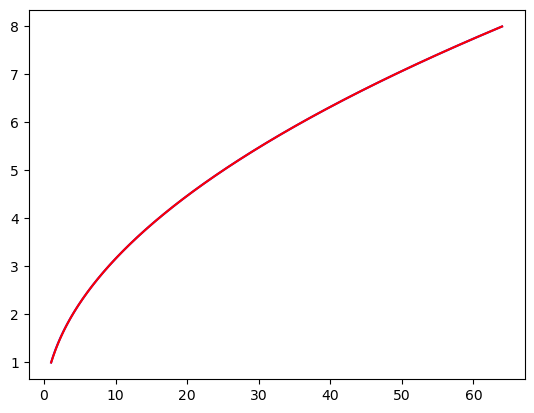

In [49]:
plt.plot(plotnodes, y1, color = 'blue', label = "Y = sqrt(x)")
plt.plot(plotnodes, interplotvalues, color = 'red', label ="interpolation")

In [48]:
errors = np.abs(y1 - interplotvalues)
maxerror = np.max(errors)
print(maxerror)


0.00699650151521225


# For smooth function such as sin(x)

In [24]:
def smoothinterplot(func , x, n):
    y = func(x)
    equalnodes = np.linspace(-2*math.pi, 2*math.pi, n)
    n = len(equalnodes) - 1
    denominators = np.zeros(n+1)
    for i in range(n+1):
        x_i = equalnodes[i]
        new_array = np.delete(equalnodes, i)
        newvector = new_array - x_i
        denominators[i] = 1/np.prod(newvector)
    
    numerators = np.zeros(n+1)
    for i in range(n+1):
        b = x
        new_array2 = np.delete(equalnodes, i)
        xvector = np.full(n, b)
        newvector2 = new_array2 - xvector
        numerators[i] = np.prod(newvector2)
        
    f_values = np.zeros(n+1)
    for i in range(n+1):
        f_values[i] = func(equalnodes[i])
    
    polynomial = numerators * denominators * f_values
    return np.sum(polynomial)


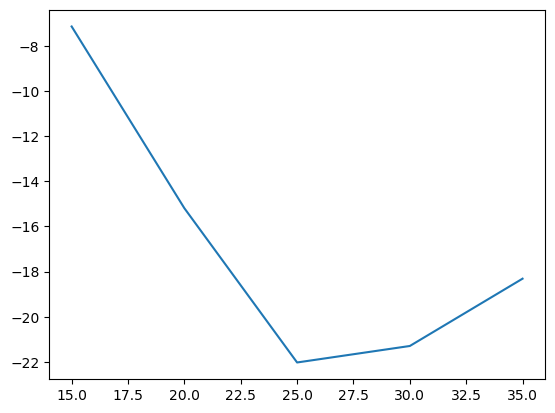

In [26]:
xrange = np.linspace(-2*math.pi, 2*math.pi,1000)
logmaxerror = np.zeros(5)
errors = np.zeros(1000)
for n in range(5):
    for i in range(1000):
        errors[i] = np.abs(smoothinterplot(math.sin, xrange[i], 15 + 5*n) - math.sin(xrange[i]))
    logmaxerror[n] = math.log(np.max(errors))
plt.plot([15,20,25,30,35], logmaxerror)    

# Runge function

In [27]:
def rungefunction(x):
    y = 1/(1+(x**2))
    return y 



In [28]:
def smoothinterplot(func , x, n):
    y = func(x)
    equalnodes = np.linspace(-5, 5, n)
    n = len(equalnodes) - 1
    denominators = np.zeros(n+1)
    for i in range(n+1):
        x_i = equalnodes[i]
        new_array = np.delete(equalnodes, i)
        newvector = new_array - x_i
        denominators[i] = 1/np.prod(newvector)
    
    numerators = np.zeros(n+1)
    for i in range(n+1):
        b = x
        new_array2 = np.delete(equalnodes, i)
        xvector = np.full(n, b)
        newvector2 = new_array2 - xvector
        numerators[i] = np.prod(newvector2)
        
    f_values = np.zeros(n+1)
    for i in range(n+1):
        f_values[i] = func(equalnodes[i])
    
    polynomial = numerators * denominators * f_values
    return np.sum(polynomial)

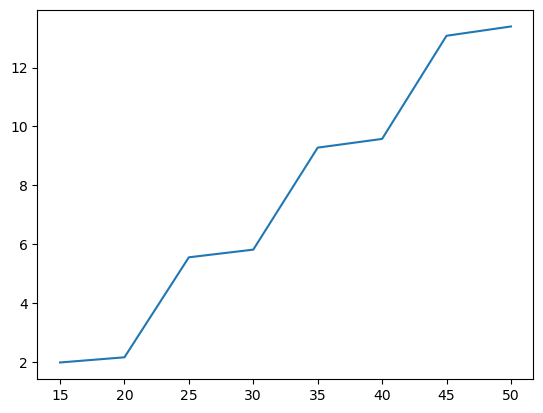

In [32]:
xrange1 = np.linspace(-5, 5,1000)
logmaxerror1 = np.zeros(8)
errors1 = np.zeros(1000)
for n in range(8):
    for i in range(1000):
        errors1[i] = np.abs(smoothinterplot(rungefunction, xrange1[i], 15 + 5*n) -  1/(1+(xrange1[i]**2)))
    logmaxerror1[n] = math.log(np.max(errors1))
plt.plot([15,20,25,30,35,40,45,50], logmaxerror1)    

The log of maximum error increases proportionally as we increase n.

# With chebyshev nodes


In [31]:
def chebysmoothinterplot(func , x, l):
    k_values = np.arange(1, l + 1)
    cheby_nodes = 0.5 * (-5 + 5) + 0.5 * (5 + 5) * np.cos((2 * k_values - 1) * np.pi / (2 * l))
    n = len(cheby_nodes) - 1
    denominators = np.zeros(n+1)
    for i in range(n+1):
        x_i = cheby_nodes[i]
        new_array = np.delete(cheby_nodes, i)
        newvector = new_array - x_i
        denominators[i] = 1/np.prod(newvector)
    
    numerators = np.zeros(n+1)
    for i in range(n+1):
        b = x
        new_array2 = np.delete(cheby_nodes, i)
        xvector = np.full(n, b)
        newvector2 = new_array2 - xvector
        numerators[i] = np.prod(newvector2)
        
    f_values = np.zeros(n+1)
    for i in range(n+1):
        f_values[i] = func(cheby_nodes[i])
    
    polynomial = numerators * denominators * f_values
    return np.sum(polynomial)

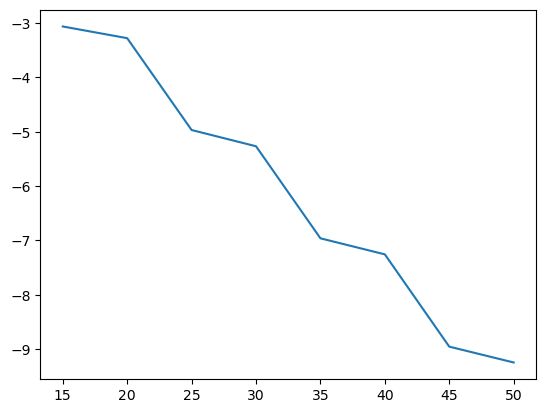

In [33]:
xrange1 = np.linspace(-5, 5,1000)
logmaxerror1 = np.zeros(8)
errors1 = np.zeros(1000)
for n in range(8):
    for i in range(1000):
        errors1[i] = np.abs(chebysmoothinterplot(rungefunction, xrange1[i], 15 + 5*n) -  1/(1+(xrange1[i]**2)))
    logmaxerror1[n] = math.log(np.max(errors1))
plt.plot([15,20,25,30,35,40,45,50], logmaxerror1)    

We see that the log of the maximum erro decreases proportionally with n.